In [22]:
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import sys
import xlrd
import random
import pandas as pd
import csv
import os
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras_metrics as km

In [23]:
#圖表函數
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

# **<font color = red>資料分割</font>**

In [24]:
# with open('data\\bank.txt') as bank:
#     rows = bank.readlines()
# trainSize = int(0.8*len(rows))
# testSize = len(rows)-trainSize
# trainData = random.sample(rows,trainSize)
# print(trainSize)
# with open("data\\bankTrain.csv","w") as csvTrain:
#     with open("data\\bankTest.csv","w") as csvTest:
#         writerTrain = csv.writer(csvTrain)
#         writerTest = csv.writer(csvTest)
#         writerTrain.writerow(rows[0][:-1].split(','))
#         writerTest.writerow(rows[0][:-1].split(','))
#         for i in rows[1:]:
#             if(np.isin(i,trainData)):
#                 writerTrain.writerow(i[:-1].split(','))
#             else:
#                 writerTest.writerow(i[:-1].split(','))
                
        

In [25]:
trainingData = pd.read_csv("data\\bankTrain.csv")
trainingData

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
2,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
3,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
4,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2159,29,services,married,secondary,no,11417,yes,no,unknown,28,may,272,2,-1,0,unknown,no
2160,33,housemaid,married,primary,no,212,yes,no,cellular,11,jul,260,2,-1,0,unknown,no
2161,45,admin.,divorced,secondary,no,0,no,no,cellular,29,oct,264,1,-1,0,unknown,yes
2162,31,blue-collar,married,secondary,no,0,no,yes,telephone,15,jul,275,2,-1,0,unknown,no


In [26]:
testingData = pd.read_csv("data\\bankTest.csv")
testingData

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
1,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
2,36,technician,married,tertiary,no,1109,no,no,cellular,13,aug,328,2,-1,0,unknown,no
3,20,student,single,secondary,no,502,no,no,cellular,30,apr,261,1,-1,0,unknown,yes
4,31,blue-collar,married,secondary,no,360,yes,yes,cellular,29,jan,89,1,241,1,failure,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,28,services,single,secondary,no,-427,yes,yes,unknown,21,may,965,2,-1,0,unknown,no
520,59,admin.,married,secondary,no,92,yes,no,cellular,12,may,139,2,350,1,failure,no
521,35,self-employed,married,tertiary,no,560,yes,no,cellular,2,apr,58,1,136,1,failure,no
522,48,blue-collar,married,primary,no,574,no,no,cellular,5,aug,348,1,-1,0,unknown,no


# **<font color = red>資料前置處理_1.刪除空直_2.將類別數值化_3.切割輸入輸出</font>**

In [27]:
trainingData=trainingData.dropna()
testingData=testingData.dropna()

In [28]:
labelencoder = LabelEncoder()

trainingData['job'] = labelencoder.fit_transform(trainingData['job'])
trainingData['marital'] = labelencoder.fit_transform(trainingData['marital'])
trainingData['education'] = labelencoder.fit_transform(trainingData['education'])
trainingData['default'] = labelencoder.fit_transform(trainingData['default'])
trainingData['housing'] = labelencoder.fit_transform(trainingData['housing'])
trainingData['loan'] = labelencoder.fit_transform(trainingData['loan'])
trainingData['contact'] = labelencoder.fit_transform(trainingData['contact'])
trainingData['month'] = labelencoder.fit_transform(trainingData['month'])
trainingData['poutcome'] = labelencoder.fit_transform(trainingData['poutcome'])
trainingData['y'] = labelencoder.fit_transform(trainingData['y'])

testingData['job'] = labelencoder.fit_transform(testingData['job'])
testingData['marital'] = labelencoder.fit_transform(testingData['marital'])
testingData['education'] = labelencoder.fit_transform(testingData['education'])
testingData['default'] = labelencoder.fit_transform(testingData['default'])
testingData['housing'] = labelencoder.fit_transform(testingData['housing'])
testingData['loan'] = labelencoder.fit_transform(testingData['loan'])
testingData['contact'] = labelencoder.fit_transform(testingData['contact'])
testingData['month'] = labelencoder.fit_transform(testingData['month'])
testingData['poutcome'] = labelencoder.fit_transform(testingData['poutcome'])
testingData['y'] = labelencoder.fit_transform(testingData['y'])

In [29]:
cols = ['y']
train_Label = trainingData[cols]
train_Features = trainingData.drop(cols,axis=1)
test_Label = testingData[cols]
test_Features = testingData.drop(cols,axis=1)

In [30]:
#進行資料正規化
min_max_scaler = preprocessing.MaxAbsScaler()   
train_Features = min_max_scaler.fit_transform(train_Features)
train_Label = min_max_scaler.fit_transform(train_Label)
test_Features = min_max_scaler.fit_transform(test_Features)
test_Label = min_max_scaler.fit_transform(test_Label)

# **<font color = red>建構model</font>**

In [31]:
from keras import backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [145]:
model = models.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(train_Features.shape[1],)))
model.add(Dropout(0.2))
model.add(layers.Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=['accuracy',f1_m,precision_m, recall_m])

In [146]:
print(model.summary())

Model: "sequential_25"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_83 (Dense)             (None, 64)                1088      
_________________________________________________________________
dropout_58 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_84 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_59 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_60 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_86 (Dense)             (None, 1)               

In [147]:
#開始訓練
train_history = model.fit(x=train_Features,
                          y=train_Label,
                          validation_split=0.2,
                          epochs=30,
                          batch_size=64,
                          verbose=0)

In [148]:
loss, accuracy, f1_score, precision, recall = model.evaluate(test_Features, test_Label, verbose=0)
print(loss, accuracy, f1_score, precision, recall)

0.2803511619567871 0.864503800868988 0.36415836215019226 0.3474790155887604 0.42941173911094666


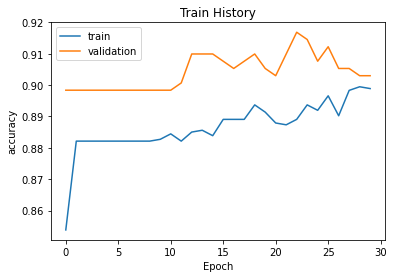

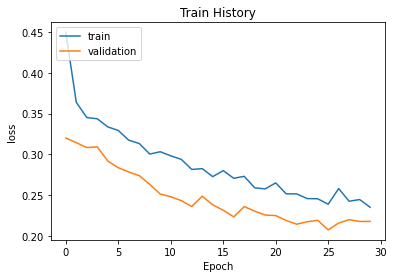

In [149]:
show_train_history(train_history,'accuracy','val_accuracy')
show_train_history(train_history,'loss','val_loss')